# SENTIMENT ANALYSIS WITH TEXTBLOB

In [6]:
from textblob import TextBlob, Word
import json
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load raw data
file_name = '../data/rawdata_20170620.json'
with open(file_name) as json_data:
    data = json.load(json_data)

In [8]:
# Convert to dataframe and remove duplicates
df = pd.DataFrame(data)
df = df.drop_duplicates()

In [9]:
# Remove punctuation and numerical characters
rem = string.punctuation
pattern = r"[{}]".format(rem)

df['text_nopunct'] = df['text'].str.replace(pattern, ' ')
df['text_nopunct'] = df['text_nopunct'].str.replace('\d+', '')

In [10]:
df['text_nopunct'][:10];

In [11]:
# Compute polarity and subjectivity of reviews
polarity = [TextBlob(review).sentiment[0] for review in df.text_nopunct]
subjectivity = [TextBlob(review).sentiment[1] for review in df.text_nopunct]

In [15]:
# Compute correlation of polarity with number of stars
np.corrcoef(polarity, df.stars)

array([[ 1.        ,  0.51000662],
       [ 0.51000662,  1.        ]])

In [16]:
# Compute correlation of subjectivity with number of stars
np.corrcoef(subjectivity, df.stars)

array([[ 1.        ,  0.16723192],
       [ 0.16723192,  1.        ]])

In [13]:
# Add polarity and subjectivity to data
df['polarity'] = polarity
df['subjectivity'] = subjectivity
df.head(5);

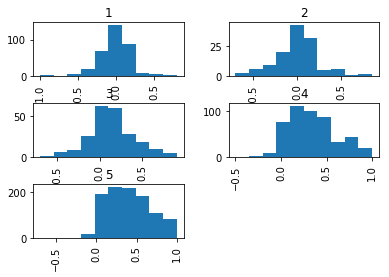

In [17]:
# Histograms of polarity by number of stars
%matplotlib inline
df['polarity'].hist(by = df['stars']);

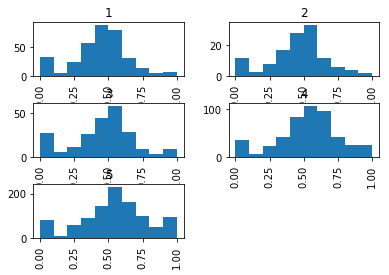

In [18]:
# Histograms of subjectivity by number of stars
%matplotlib inline
df['subjectivity'].hist(by = df['stars']);

In [20]:
# Descriptive stats of polarity & subjectivity per number of stars
df.groupby('stars').describe()

polarity  subjectivity
stars                                 
1     count   346.000000    346.000000
      mean     -0.017479      0.440406
      std       0.227011      0.204506
      min      -1.000000      0.000000
      25%      -0.129688      0.351429
      50%       0.000000      0.457143
      75%       0.110119      0.545198
      max       0.800000      1.000000
2     count   125.000000    125.000000
      mean      0.005484      0.451478
      std       0.258326      0.212996
      min      -0.700000      0.000000
      25%      -0.125000      0.358333
      50%       0.000000      0.471667
      75%       0.134799      0.570000
      max       0.855000      1.000000
3     count   226.000000    226.000000
      mean      0.135295      0.456894
      std       0.279529      0.234396
      min      -0.700000      0.000000
      25%       0.000000      0.362500
      50%       0.124580      0.491528
      75%       0.281719      0.600000
      max       0.910000      1.000000
4     count   488.000000    488.000000
      mean      0.330977      0.524697
      std       0.263681      0.229205
      min      -0.500000      0.000000
      25%       0.133654      0.410897
      50%       0.306280      0.544544
      75%       0.500000      0.646713
      max       1.000000      1.000000
5     count  1034.000000   1034.000000
      mean      0.395654      0.541165
      std       0.285815      0.251398
      min      -0.700000      0.000000
      25%       0.187542      0.400000
      50%       0.379583      0.553889
      75%       0.566667      0.693333
      max       1.000000      1.000000